In [109]:
import os
import glob
import miditoolkit
import matplotlib.pyplot as plt
from mido import MidiFile
import numpy as np
import seaborn as sns
import pandas as pd

In [147]:
sub_dataset = glob.glob('../../../maestro-v3.0.0/no-pedal/midi/2011/*.midi')
duration_dict = {}
bpm_dict = {}
density_dict = {}

for idx, filepath in enumerate(sub_dataset):
    print('Processing {}/{}'.format(idx, len(sub_dataset)))
    midi_obj = miditoolkit.midi.parser.MidiFile(filepath)
    bpm = midi_obj.tempo_changes[0]  # Read tempo
    if bpm in bpm_dict.keys():
        bpm_dict[bpm] += 1
    else:
        bpm_dict[bpm] = 1
        
    frame = midi_obj.time_signature_changes[0].numerator*4  # Set frame to every 4 bars for density
    frame_tick = midi_obj.ticks_per_beat * frame
    
    end_tick = frame_tick
    length_dict = {}
    onset = [i for i in midi_obj.instruments[0].control_changes if i.value==127]
    offset = [j for j in midi_obj.instruments[0].control_changes if j.value==0]
    for idx, pedal in enumerate(onset):
        bar = round(pedal.time / frame_tick)
        if bar in length_dict.keys():
            length_dict[bar].append(pedal)
            length_dict[bar].append(offset[idx])
        else:
            length_dict[bar] = [pedal]
            length_dict[bar].append(offset[idx])
            
    keys = length_dict.keys()
    for k in range(len(keys)):
        if k not in keys:
            length_dict[k] = []
            
    
    for a in length_dict.values():
        if len(a) in density_dict.keys():
            density_dict[len(a)] += 1
        else:
            density_dict[len(a)] = 1
            


Processing 0/163
Processing 1/163
Processing 2/163
Processing 3/163
Processing 4/163
Processing 5/163
Processing 6/163
Processing 7/163
Processing 8/163
Processing 9/163
Processing 10/163
Processing 11/163
Processing 12/163
Processing 13/163
Processing 14/163
Processing 15/163
Processing 16/163
Processing 17/163
Processing 18/163
Processing 19/163
Processing 20/163
Processing 21/163
Processing 22/163
Processing 23/163
Processing 24/163
Processing 25/163
Processing 26/163
Processing 27/163
Processing 28/163
Processing 29/163
Processing 30/163
Processing 31/163
Processing 32/163
Processing 33/163
Processing 34/163
Processing 35/163
Processing 36/163
Processing 37/163
Processing 38/163
Processing 39/163
Processing 40/163
Processing 41/163
Processing 42/163
Processing 43/163
Processing 44/163
Processing 45/163
Processing 46/163
Processing 47/163
Processing 48/163
Processing 49/163
Processing 50/163
Processing 51/163
Processing 52/163
Processing 53/163
Processing 54/163
Processing 55/163
Pr

In [94]:
print(bpm_dict)
print(density_dict)

{TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, TempoChange(tempo=120.0, time=0): 1, 

In [105]:
np.array(list(density_dict.items()))[:, 1]

array([1295,  920,  699, 1139,  377,  496,  232,  295,  165,   15,  113,
         77,   22,   16,   40,   25,    2,    1,    1,    1,    1])

/home/jching9/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'histogram of pedal density')

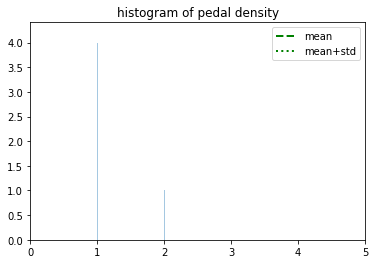

In [107]:
density_mean = np.mean(np.array(list(density_dict.items()))[:, 1])
density_std = np.std(np.array(list(density_dict.items()))[:, 1])
density_meanplusstd = density_mean + density_std
sns.distplot(np.array(list(density_dict.items()))[:, 1], bins=int(np.max(np.array(list(density_dict.items()))[:, 1])*100), kde=False)
ymin,ymax = plt.ylim()
plt.vlines(density_mean, ymin, ymax, linestyle='dashed', lw=2, color='green',label='mean')
plt.vlines(density_meanplusstd, ymin, ymax, linestyle='dotted', lw=2, color='green',label='mean+std')
plt.xlim(0, 5)
plt.legend()
plt.title('histogram of pedal density')

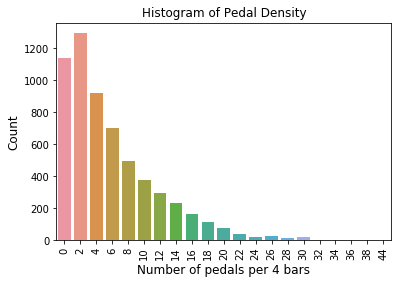

In [148]:
keys = list(density_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = list(density_dict.values())
p = sns.barplot(x=keys, y=vals)
p.set_xticklabels(p.get_xticklabels(),rotation = 90)
p.set_xlabel("Number of pedals per 4 bars", fontsize = 12)
p.set_ylabel("Count", fontsize = 12)
p.set(title='Histogram of Pedal Density')
plt.savefig('../image/density_dist_4bar.png')

In [72]:
keys = length_dict.keys()
print(len(keys))
for k in range(len(keys)):
    if k not in keys:
        length_dict[k] = []

25


In [74]:
distribute = {}
for a in length_dict.values():
    if len(a) in distribute.keys():
        distribute[len(a)] += 1
    else:
        distribute[len(a)] = 1
        
distribute

{2: 15, 4: 6, 6: 1, 0: 10}

In [ ]:
print('Calculating pedalled segment length...')
pedal_lengths = []
years = ['2002','2004','2006','2008','2009','2011']
for year in years:
    print('  {}..'.format(year))
    txt_path = os.path.join(DIR_PEDAL_METADATA,'filename-{}.txt'.format(year))
    filenames = np.genfromtxt(txt_path, dtype=None)

    for filename in filenames:
        midi_path = os.path.join(DIR_RENDERED, '{}.mid'.format(filename))
        
        # get ground truth pedal onset time from midi
        pm = pretty_midi.PrettyMIDI(midi_path)
        pedal_v = []
        pedal_t = []
        for control_change in pm.instruments[0].control_changes:
            if control_change.number == 64:
                pedal_v.append(control_change.value)
                pedal_t.append(control_change.time)
                
        pedal_onset = []
        pedal_offset = []
        for i,v in enumerate(pedal_v):
            if i>0 and v>=64 and pedal_v[i-1]<64:
                pedal_onset.append(pedal_t[i])   
            elif i>0 and v<64 and pedal_v[i-1]>=64:
                pedal_offset.append(pedal_t[i])
        
        pedal_offset = [t for t in pedal_offset if t > pedal_onset[0]]
        seg_idxs = np.min([len(pedal_onset), len(pedal_offset)])
        pedal_offset = pedal_offset[:seg_idxs]
        pedal_onset = pedal_onset[:seg_idxs]
        for seg_idx, offset in enumerate(pedal_offset):
            if offset != pedal_offset[-1] and offset > pedal_onset[seg_idx] and offset < pedal_onset[seg_idx+1]:
                correct_pedal_data = True
            elif offset == pedal_offset[-1] and offset > pedal_onset[seg_idx]:
                correct_pedal_data = True
            else:
                correct_pedal_data = False
        
        if correct_pedal_data:
            for seg_idx in np.arange(seg_idxs):
                pedal_lengths.append(pedal_offset[seg_idx]-pedal_onset[seg_idx])

print('Done!')